# Compute the definite integral by the Monte Carlo method

In [2]:
f = @(x) sin(x);  % Define the function
a = 0; b = pi;    % Set the integration limits
Lf = 0;  Uf = 1;  % The lower and upper bounds of the function f
exact_val = integral(f,a,b)   % The exact value
N = 10000; % The number of samples

exact_val =  2.0000


## The Hit-or-Miss Method

In [3]:
X = (b-a)*rand(N,1)+a; Y = (Uf-Lf)*rand(N,1)+Lf;  % The X and Y coordinates of sampled points

In [4]:
IBP = (Y < f(X));  % Mark the points below the plot
HME  = (b-a)*(Uf-Lf) * IBP;  % Sampled values of the estimator

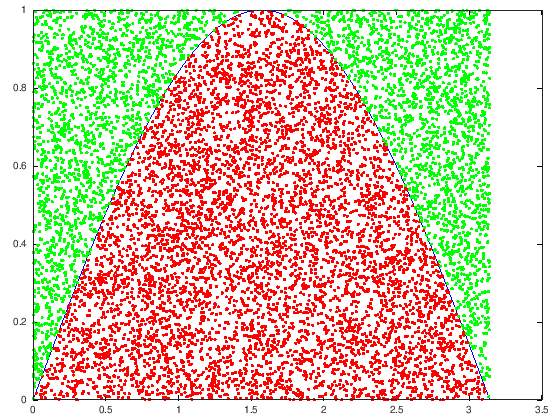

In [5]:
XB = X(IBP); YB = Y(IBP);  % The points below the plot
XU = X(not(IBP)); YU = Y(not(IBP));  % The points abovee the plot
plot(linspace(a,b,100),f(linspace(a,b,100)),'b');
hold on;
plot(XB,YB,'r.')
plot(XU,YU,'g.')
hold off

In [6]:
Int_HOM_Est =  mean(HME);
Int_HOM_Err =  std(HME) / sqrt(N);

In [7]:
fprintf('The Hit-or-Miss Method\n')
fprintf('Sample size is %5d\n',N)
fprintf('Sample mean is %8.4f\n',Int_HOM_Est)
fprintf('Stat. error is %8.5f\n',Int_HOM_Err)
fprintf('Abs.  error is %8.5f\n',abs(exact_val-Int_HOM_Est))

The Hit-or-Miss Method
Sample size is 10000
Sample mean is   1.9949
Stat. error is  0.01513
Abs.  error is  0.00509


## The Sample Mean Method

In [8]:
X = (b-a)*rand(N,1)+a; % The X coordinate of sampled points
SME = f(X)*(b-a);  % The sampled values of the estimators

In [9]:
Int_SM_Est = mean(SME);
Int_SM_Err = std(SME) / sqrt(N);

In [10]:
fprintf('The Sample Mean Method\n')
fprintf('Sample size is %5d\n',N)
fprintf('Sample mean is %8.4f\n',Int_SM_Est)
fprintf('Stat. error is %8.5f\n',Int_SM_Err)
fprintf('Abs.  error is %8.5f\n',abs(exact_val-Int_SM_Est))

The Sample Mean Method
Sample size is 10000
Sample mean is   2.0046
Stat. error is  0.00962
Abs.  error is  0.00463


## The Weighted Method

### Function $g(x)=x$

In [11]:
cval1 = integral(@(x) x-a,a,b)
g1 = @(x) (x-a)/cval1;  % the density with normalizing constant cval
G1 = @(x) (x-a).^2/cval1/2;  % the CDF
IG1 = @(u) sqrt(2*cval1*u)+a; % the inverse CDF

cval1 =  4.9348


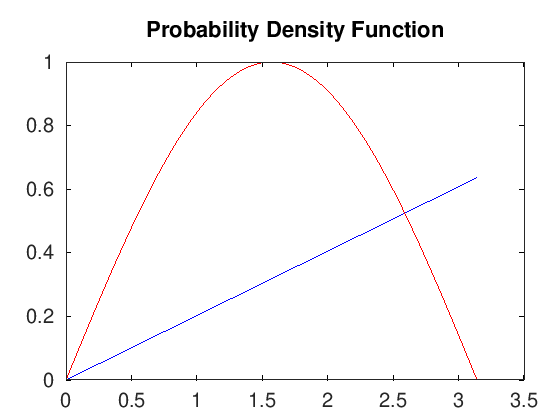

In [12]:
plot(linspace(a,b,100),g1(linspace(a,b,100)),'b')
hold on
plot(linspace(a,b,100),f(linspace(a,b,100)),'r')
title({ 'Probability Density Function'})
set(gca,'fontsize',20)
hold off

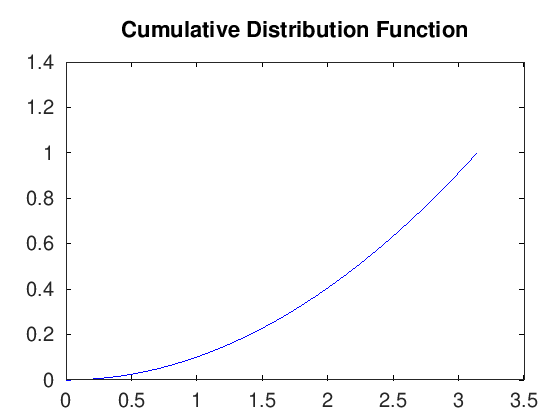

In [13]:
plot(linspace(a,b,100),G1(linspace(a,b,100)),'b')
hold on
title({ 'Cumulative Distribution Function'})
set(gca,'fontsize',20)
hold off

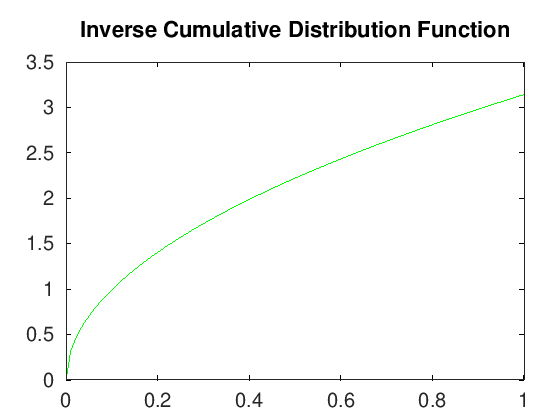

In [14]:
plot(linspace(0,1,100),IG1(linspace(0,1,100)),'g')
hold on
title({ 'Inverse Cumulative Distribution Function'})
set(gca,'fontsize',20)
hold off

In [15]:
U = rand(N,1)+a;  % The uniform samples
X1 = IG1(U);        % The samples of X ~ g
WME1 = f(X1)./g1(X1);  % The sampled values of the estimators

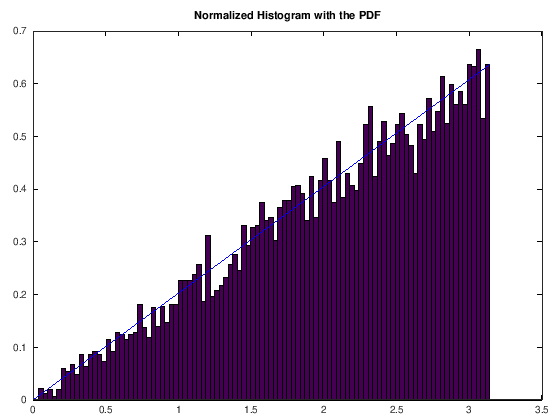

In [16]:
NumBin = 100;
hist(X1,NumBin,1/((b-a)/NumBin));  
hold on;
plot(linspace(a,b,100),g1(linspace(a,b,100)),'b');
title({ 'Normalized Histogram with the PDF'})
hold off

In [17]:
Int_WM1_Est = mean(WME1);
Int_WM1_Err = std(WME1) / sqrt(N);

In [18]:
fprintf('The Weighted Method\n')
fprintf('Sample size is %5d\n',N)
fprintf('Sample mean is %8.4f\n',Int_WM1_Est)
fprintf('Stat. error is %8.5f\n',Int_WM1_Err)
fprintf('Abs.  error is %8.5f\n',abs(exact_val-Int_WM1_Est))

The Weighted Method
Sample size is 10000
Sample mean is   1.9988
Stat. error is  0.01408
Abs.  error is  0.00124


### Function $g(x)=x\mathbb{I}_{[0,\pi/2)}(x) + (\pi/2-x)\mathbb{I}_{[\pi/2,\pi]}(x)$ 

In [19]:
cval2 = integral(@(x) x-a,a,(a+b)/2) + integral(@(x) b-x,(a+b)/2,b)
g2 = @(x) ( (x-a).*(x<(b+a)/2) + (b-x).*(x>=(b+a)/2) )/cval2;  % the density with normalizing constant cval
G2 = @(x) (x-a).^2.*(x<(b+a)/2)/cval2/2 + (1-(b-x).^2/cval2/2).*(x>=(b+a)/2) ;  % the CDF
IG2 = @(u) (sqrt(2*cval2*u)+a).*(u<0.5)+ (b-sqrt(2*cval2*(1-u))).*(u>=0.5); % the inverse CDF

cval2 =  2.4674


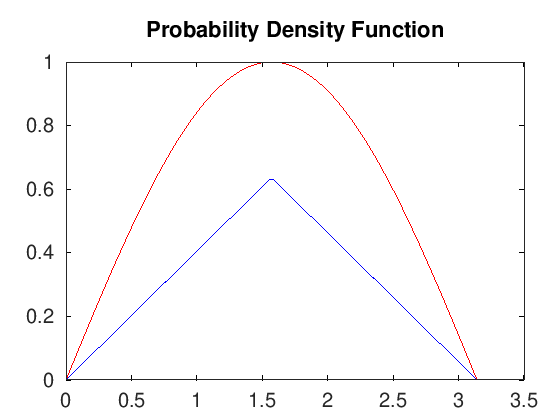

In [20]:
plot(linspace(a,b,100),g2(linspace(a,b,100)),'b')
hold on
plot(linspace(a,b,100),f(linspace(a,b,100)),'r')
title({ 'Probability Density Function'})
set(gca,'fontsize',20)
hold off

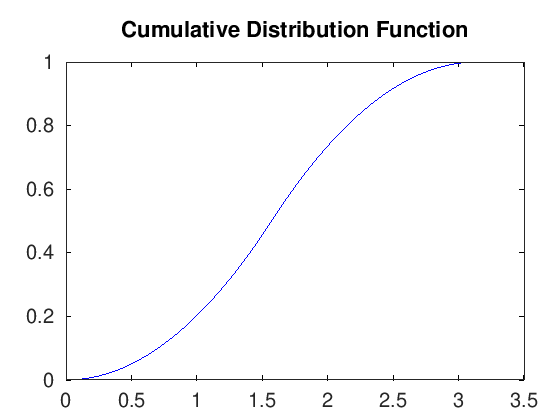

In [21]:
plot(linspace(a,b,100),G2(linspace(a,b,100)),'b')
hold on
title({ 'Cumulative Distribution Function'})
set(gca,'fontsize',20)
hold off

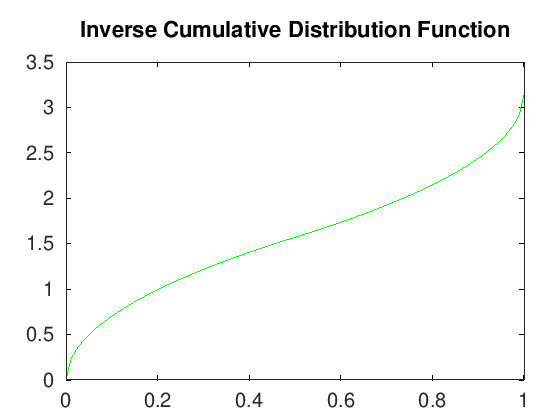

In [22]:
plot(linspace(0,1,100),IG2(linspace(0,1,100)),'g')
hold on
title({ 'Inverse Cumulative Distribution Function'})
set(gca,'fontsize',20)
hold off

In [23]:
U = rand(N,1);     % The uniform samples
X2 = IG2(U);       % The samples of X ~ g
WME2 = f(X2)./g2(X2);  % The sampled values of the estimators

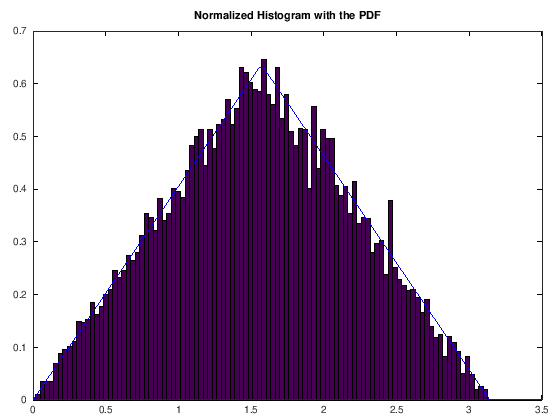

In [24]:
NumBin = 100;
hist(X2,NumBin,1/((b-a)/NumBin));  
hold on;
plot(linspace(a,b,100),g2(linspace(a,b,100)),'b');
title({ 'Normalized Histogram with the PDF'})
hold off

In [25]:
Int_WM2_Est = mean(WME2);
Int_WM2_Err = std(WME2) / sqrt(N);

In [26]:
fprintf('The Weighted Method\n')
fprintf('Sample size is %5d\n',N)
fprintf('Sample mean is %8.4f\n',Int_WM2_Est)
fprintf('Stat. error is %8.5f\n',Int_WM2_Err)
fprintf('Abs.  error is %8.5f\n',abs(exact_val-Int_WM2_Est))

The Weighted Method
Sample size is 10000
Sample mean is   1.9998
Stat. error is  0.00257
Abs.  error is  0.00024
